# Analysing Smartphone Prices

In [14]:
from metaflow import Flow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Flow for web crawling and calculating prices ranges

In [1]:
!python main.py show

Metaflow 2.0.5 executing DevicesPriceRangesFlow for user:dev

Flow created to look online for devices
prices available in a csv dataset and
based on online prices update their
market prices and create price ranges
as very low, low, medium, high and very
high prices.

Step start
    Loading the reference csv
    and treating the data by deleting
    duplicates and keeping  only informative device names.
    => crawling_for_prices

Step crawling_for_prices
    Crawling for multiple prices at online webstores
               to update values.
    => treating_prices

Step treating_prices
    Removing outliers and non related prices.
    And choosing the median value for each device.
    => creating_price_ranges

Step creating_price_ranges
    Using prices found to create
    price ranges based on ibge 
    salary ranges
    => end

Step end
    End the flow.
    Output data available on
    Flow variable:
        extracted_data_df
    Inside Data Folder:
        extracted_device_data_2.csv


### Running the flow

In [2]:
!python main.py --no-pylint run

Metaflow 2.0.5 executing DevicesPriceRangesFlow for user:dev
Validating your flow...
    The graph looks good!
2020-06-19 15:27:06.652 Workflow starting (run-id 1592591226648517):
2020-06-19 15:27:06.656 [1592591226648517/start/1 (pid 18460)] Task is starting.
2020-06-19 15:27:07.341 [1592591226648517/start/1 (pid 18460)] Task finished successfully.
2020-06-19 15:27:07.348 [1592591226648517/crawling_for_prices/2 (pid 18465)] Task is starting.
2020-06-19 15:27:08.195 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:08 [scrapy.utils.log] INFO: Scrapy 2.1.0 started (bot: scrapybot)
2020-06-19 15:27:08.222 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:08 [scrapy.utils.log] INFO: Versions: lxml 4.5.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.8.3 (default, May 19 2020, 18:47:26) - [GCC 7.3.0], pyOpenSSL 19.1.0 (OpenSSL 1.1.1g  21 Apr 2020), cryptography 2.9.2, Platform Linux-5.3.0-53-generic-x86_64-wi

2020-06-19 15:27:09.000 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:08 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/6044d> from <GET https://celulares.mercadolivre.com.br/6044D>
2020-06-19 15:27:09.017 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/6055b> from <GET https://celulares.mercadolivre.com.br/6055B>
2020-06-19 15:27:09.026 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/6t> from <GET https://celulares.mercadolivre.com.br/6T>
2020-06-19 15:27:09.034 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadol

2020-06-19 15:27:10.479 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/a2016b30> from <GET https://celulares.mercadolivre.com.br/A2016b30>
2020-06-19 15:27:10.635 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/a2017> from <GET https://celulares.mercadolivre.com.br/A2017>
2020-06-19 15:27:10.663 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/a3> from <GET https://celulares.mercadolivre.com.br/A3>
2020-06-19 15:27:10.674 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.me

2020-06-19 15:27:11.991 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/a7pro> from <GET https://celulares.mercadolivre.com.br/A7Pro>
2020-06-19 15:27:12.075 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:12 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/action-x3> from <GET https://celulares.mercadolivre.com.br/ACTION-X3>
2020-06-19 15:27:12.118 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/a3300-gv> (referer: None)
2020-06-19 15:27:12.132 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:12 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/alcatel-3c> from <GET https://celula

2020-06-19 15:27:14.270 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/alcatel-onetouch-pixi-3-%283.5%29> (referer: None)
2020-06-19 15:27:14.353 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/alcatel-onetouch-pixi-3-%284.5%29> (referer: None)
2020-06-19 15:27:14.367 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:14 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/alcatel-5> from <GET https://celulares.mercadolivre.com.br/Alcatel%205>
2020-06-19 15:27:14.440 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:14 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/alcatel_4060A_true> from <GET https://celulare

2020-06-19 15:27:16.734 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/alpha> (referer: None)
2020-06-19 15:27:16.855 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/alpha_X_true> (referer: None)
2020-06-19 15:27:16.869 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/armor_6E_true> from <GET https://celulares.mercadolivre.com.br/Armor_6E>
2020-06-19 15:27:16.910 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/arnova-97-g4> from <GET https://celulares.mercadolivre.com.br/Arnova%2097%20G4>
2020-06-19 15:

2020-06-19 15:27:18.288 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/b3-a40> (referer: None)
2020-06-19 15:27:18.329 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/ascend-y221> (referer: None)
2020-06-19 15:27:18.330 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:18 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/b2017g>: HTTP status code is not handled or not allowed
2020-06-19 15:27:18.405 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/blu-grand-m> from <GET https://celulares.mercadolivre.com.br/BLU%20Grand%20M>
2020-06-19 15:27:18.433 [159259122664851

2020-06-19 15:27:19.713 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/blu-studio-j8-lte> (referer: None)
2020-06-19 15:27:19.818 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:19 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/blade-zmax> (referer: None)
2020-06-19 15:27:19.882 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/blu-dash-xl> (referer: None)
2020-06-19 15:27:19.896 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:19 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/c5> from <GET https://celulares.mercadolivre.com.br/C5>
2020-06-19 15:27:19.905 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:19 [

2020-06-19 15:27:21.276 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/c301sa-chromebook%2520c202sa-c300sa> from <GET https://celulares.mercadolivre.com.br/Chromebook%20C202SA/C300SA/C301SA>
2020-06-19 15:27:21.341 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/c30-lite> (referer: None)
2020-06-19 15:27:21.396 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:21 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/cph1707> (referer: None)
2020-06-19 15:27:21.406 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:21 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/cph1701> (referer: None)
2020-06-19 15:27:21.532 [1592591226648517/crawling

2020-06-19 15:27:22.370 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/d100-%28l20%29> (referer: None)
2020-06-19 15:27:22.380 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:22 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/defy> from <GET https://celulares.mercadolivre.com.br/Defy>
2020-06-19 15:27:22.392 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:22 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/dream-d1> from <GET https://celulares.mercadolivre.com.br/Dream%20D1>
2020-06-19 15:27:22.460 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/d105> (referer: None)
2020-06-19 15:27:22.540 [15925912266

2020-06-19 15:27:24.222 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:24 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/e5006>: HTTP status code is not handled or not allowed
2020-06-19 15:27:24.256 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/energy_DIAMOND_MINI> (referer: None)
2020-06-19 15:27:24.282 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:24 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/emulator>: HTTP status code is not handled or not allowed
2020-06-19 15:27:24.305 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/fly> from <GET https://celulares.mercadolivre.com.br/Fly>


2020-06-19 15:27:25.735 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:25 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/freetel-samurai-kiwami-2>: HTTP status code is not handled or not allowed
2020-06-19 15:27:25.749 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:25 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/fire-hd-8-%282018%29>: HTTP status code is not handled or not allowed
2020-06-19 15:27:25.859 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/g3-stylus> from <GET https://celulares.mercadolivre.com.br/G3%20Stylus>
2020-06-19 15:27:25.876 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http

2020-06-19 15:27:27.551 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:27 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/gamepad2> from <GET https://celulares.mercadolivre.com.br/GAMEPAD2>
2020-06-19 15:27:27.692 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:27 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/go3c> from <GET https://celulares.mercadolivre.com.br/GO3C>
2020-06-19 15:27:27.757 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/g5> (referer: None)
2020-06-19 15:27:27.773 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:27 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/go5c> from <GET https://celulares.mercadolivre

2020-06-19 15:27:29.012 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:29 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-a3%282016%29> from <GET https://celulares.mercadolivre.com.br/Galaxy%20A3%282016%29>
2020-06-19 15:27:29.049 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:29 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-a3%282017%29> from <GET https://celulares.mercadolivre.com.br/Galaxy%20A3%282017%29>
2020-06-19 15:27:29.176 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:29 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-a30> from <GET https://celulares.mercadolivre.com.br/Galaxy%20A30>
2020-06-19 15:27:29.220 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:29 [scrapy.downloadermid

2020-06-19 15:27:30.991 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-a5> (referer: None)
2020-06-19 15:27:31.022 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:31 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-a7%282017%29> from <GET https://celulares.mercadolivre.com.br/Galaxy%20A7%282017%29>
2020-06-19 15:27:31.039 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:31 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-a70> from <GET https://celulares.mercadolivre.com.br/Galaxy%20A70>
2020-06-19 15:27:31.073 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-a5-duos> (referer: N

2020-06-19 15:27:32.855 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:32 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-c7> from <GET https://celulares.mercadolivre.com.br/Galaxy%20C7>
2020-06-19 15:27:32.911 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-a8-star> (referer: None)
2020-06-19 15:27:32.952 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-a8> (referer: None)
2020-06-19 15:27:32.964 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-a8%282018%29> (referer: None)
2020-06-19 15:27:32.989 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2

2020-06-19 15:27:35.076 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:35 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/galaxy-core-ii-%28sm-g355h%29>: HTTP status code is not handled or not allowed
2020-06-19 15:27:35.278 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-ace-4-lite> (referer: None)
2020-06-19 15:27:35.290 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-ace-4-neo> (referer: None)
2020-06-19 15:27:35.565 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-core-prime> (referer: None)
2020-06-19 15:27:35.598 [1592591226648517/crawling_for_prices/2 (pid 1

2020-06-19 15:27:36.853 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:36 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/galaxy-grand-neo-%28gt-i9060%29> (referer: None)
2020-06-19 15:27:36.866 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-grand-neo> (referer: None)
2020-06-19 15:27:36.955 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:36 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/galaxy-grand-neo-%28gt-i9060%29>: HTTP status code is not handled or not allowed
2020-06-19 15:27:37.005 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-grand-duos-%28gt-i9082l%29> (referer: None)
2020-06-19 15:27:37.066 [1592591226648

2020-06-19 15:27:38.831 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-j1-ace> (referer: None)
2020-06-19 15:27:38.860 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-j2-pro> (referer: None)
2020-06-19 15:27:38.916 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-j2-core> (referer: None)
2020-06-19 15:27:39.072 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-j3> (referer: None)
2020-06-19 15:27:39.082 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https:/

2020-06-19 15:27:40.986 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-j6> (referer: None)
2020-06-19 15:27:41.018 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-j5%282017%29> (referer: None)
2020-06-19 15:27:41.120 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-j7-duo> (referer: None)
2020-06-19 15:27:41.222 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:41 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-j7-refine> from <GET https://celulares.mercadolivre.com.br/Galaxy%20J7%20Refine>
2020-06-19 15:27:41.260 [1592591226648517/crawling_for_prices/2

2020-06-19 15:27:43.222 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:43 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/galaxy-k-zoom> (referer: None)
2020-06-19 15:27:43.324 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:43 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/galaxy-k-zoom>: HTTP status code is not handled or not allowed
2020-06-19 15:27:43.487 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-note-3-lte-sm-n900w8> from <GET https://celulares.mercadolivre.com.br/Galaxy%20Note%203%20LTE%20%20SM-N900W8>
2020-06-19 15:27:43.515 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadoliv

2020-06-19 15:27:46.013 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-note-fan-edition> (referer: None)
2020-06-19 15:27:46.060 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:46 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-note10%C3%BE> from <GET https://celulares.mercadolivre.com.br/Galaxy%20Note10%2B>
2020-06-19 15:27:46.069 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:46 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-note5> from <GET https://celulares.mercadolivre.com.br/Galaxy%20Note5>
2020-06-19 15:27:46.075 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:46 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercad

2020-06-19 15:27:48.346 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-pocket-neo-gt-s5310> (referer: None)
2020-06-19 15:27:48.362 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-s-iii> from <GET https://celulares.mercadolivre.com.br/Galaxy%20S%20III>
2020-06-19 15:27:48.371 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-on5%282016%29> (referer: None)
2020-06-19 15:27:48.379 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-s-iii-mini-%28gt-i8200l%29> from <GET https://celul

2020-06-19 15:27:50.388 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:50 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-s4-zoom> from <GET https://celulares.mercadolivre.com.br/Galaxy%20S4%20Zoom>
2020-06-19 15:27:50.396 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:50 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-s5-%28at-t%29-%5Bsm-g900a%5D> from <GET https://celulares.mercadolivre.com.br/Galaxy%20S5%20%28AT%26T%29%20%5BSM-G900A%5D>
2020-06-19 15:27:50.433 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:50 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-s5-%28sm-g900i%29> from <GET https://celulares.mercadolivre.com.br/Galaxy%20S5%20%28SM-G900I%29>
2020-06-19 15:27:50.545 [1592591226648517/crawling_for_pri

2020-06-19 15:27:52.020 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-s5-lte> (referer: None)
2020-06-19 15:27:52.031 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:52 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-s7> from <GET https://celulares.mercadolivre.com.br/Galaxy%20S7>
2020-06-19 15:27:52.049 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-s5-lte-a-%28sm-g900w8%29> (referer: None)
2020-06-19 15:27:52.157 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:52 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-s7-active> from <GET https://celulares.mercadolivre.com.br/Ga

2020-06-19 15:27:53.917 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:53 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-tab-3-v> from <GET https://celulares.mercadolivre.com.br/Galaxy%20Tab%203%20V>
2020-06-19 15:27:53.941 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:53 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-tab-4-10.1-%28sm-t530%29> from <GET https://celulares.mercadolivre.com.br/Galaxy%20Tab%204%2010.1%20%28SM-T530%29>
2020-06-19 15:27:53.959 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-star-trios-gt-s5283b> (referer: None)
2020-06-19 15:27:54.065 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https

2020-06-19 15:27:55.829 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-tab-a-7.0> from <GET https://celulares.mercadolivre.com.br/Galaxy%20Tab%20A%207.0>
2020-06-19 15:27:55.856 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-tab-a-8.0> from <GET https://celulares.mercadolivre.com.br/Galaxy%20Tab%20A%208.0>
2020-06-19 15:27:55.879 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:55 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/galaxy-tab-4-10.1-%28sm-t530%29>: HTTP status code is not handled or not allowed
2020-06-19 15:27:55.957 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:55 [scrapy.core.engine] DEBU

2020-06-19 15:27:56.764 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:56 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/galaxy-tab-a2-8.0> (referer: None)
2020-06-19 15:27:56.764 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:56 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/galaxy-tab-a-8.0>: HTTP status code is not handled or not allowed
2020-06-19 15:27:56.817 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:56 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/galaxy-tab-e-9.6> (referer: None)
2020-06-19 15:27:56.843 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:56 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/galaxy-tab-s2-9.7> from <GET https://celulares.mercadolivre.com.br/Galaxy%20Tab%20S2%209.7>


2020-06-19 15:27:57.567 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:57 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/galaxy-tab-s2-8.0>: HTTP status code is not handled or not allowed
2020-06-19 15:27:57.631 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:57 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/galaxy-tab-s-8.4-lte-sm-t705>: HTTP status code is not handled or not allowed
2020-06-19 15:27:57.658 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:57 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/galaxy-tab-s4> (referer: None)
2020-06-19 15:27:57.667 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:57 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/galaxy-tab-s2-9.7> (referer: None)
2020-06-19 15:27:57.683

2020-06-19 15:27:58.875 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:58 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/google-nexus-7> from <GET https://celulares.mercadolivre.com.br/Google%20Nexus%207>
2020-06-19 15:27:58.925 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:58 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/go-2> from <GET https://celulares.mercadolivre.com.br/Go%202>
2020-06-19 15:27:58.952 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-trend-lite-gt-s7390l> (referer: None)
2020-06-19 15:27:59.129 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:27:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-tabs3> (referer: None)

2020-06-19 15:28:01.265 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/grand-energy> (referer: None)
2020-06-19 15:28:01.275 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/galaxy-young2> (referer: None)
2020-06-19 15:28:01.285 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/grand-prime-plus> (referer: None)
2020-06-19 15:28:01.324 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:01 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/grand-s-ii>: HTTP status code is not handled or not allowed
2020-06-19 15:28:01.368 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:01 [

2020-06-19 15:28:02.683 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/htc-u11%C3%BE> (referer: None)
2020-06-19 15:28:02.840 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/hot-4-pro> (referer: None)
2020-06-19 15:28:03.208 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/htc-bolt> (referer: None)
2020-06-19 15:28:03.332 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/huawei-gr3> (referer: None)
2020-06-19 15:28:03.535 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulare

2020-06-19 15:28:04.951 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/huawei-p30-pro> (referer: None)
2020-06-19 15:28:04.970 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/huawei-y6-2018> (referer: None)
2020-06-19 15:28:05.011 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:05 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/huawei-p-smart%C3%BE-2019>: HTTP status code is not handled or not allowed
2020-06-19 15:28:05.077 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/huawei-y5-lite-2018> (referer: None)
2020-06-19 15:28:05.113 [1592591226648517/crawling_for_prices/2 (pid 18465)] 

2020-06-19 15:28:06.827 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/honor-10> (referer: None)
2020-06-19 15:28:06.849 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:06 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/honor-note10> from <GET https://celulares.mercadolivre.com.br/Honor%20Note10>
2020-06-19 15:28:06.864 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:06 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/honor-7a> (referer: None)
2020-06-19 15:28:06.888 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/honor-4c> (referer: None)
2020-06-19 15:28:06.987 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15

2020-06-19 15:28:08.472 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/honor-v9> (referer: None)
2020-06-19 15:28:08.487 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:08 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/ideos-s7> (referer: None)
2020-06-19 15:28:08.503 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/idol-5> (referer: None)
2020-06-19 15:28:08.596 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/ideatab-a1000> (referer: None)
2020-06-19 15:28:08.641 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:08 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 ht

2020-06-19 15:28:10.024 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/k3-note> (referer: None)
2020-06-19 15:28:10.025 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:10 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/k3-2017>: HTTP status code is not handled or not allowed
2020-06-19 15:28:10.051 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/k7> from <GET https://celulares.mercadolivre.com.br/K7>
2020-06-19 15:28:10.416 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/k8> from <GET https://celulares.mercadolivre.com.br/K8>
2020-06

2020-06-19 15:28:11.645 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:11 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/k900>: HTTP status code is not handled or not allowed
2020-06-19 15:28:11.684 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/k8> (referer: None)
2020-06-19 15:28:11.694 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/k8-note> (referer: None)
2020-06-19 15:28:11.829 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/k8-%282017%29> (referer: None)
2020-06-19 15:28:12.019 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:12 [scrapy.core.engine] DEBUG

2020-06-19 15:28:12.994 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:12 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/lg-leon-tv> from <GET https://celulares.mercadolivre.com.br/LG%20Leon%20TV>
2020-06-19 15:28:13.015 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/l70-dual-d325> (referer: None)
2020-06-19 15:28:13.126 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/l70> (referer: None)
2020-06-19 15:28:13.159 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/l90-dual-d410> (referer: None)
2020-06-19 15:28:13.247 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19

2020-06-19 15:28:14.394 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:14 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/life-one-x2-mini> from <GET https://celulares.mercadolivre.com.br/LIFE%20ONE%20X2%20MINI>
2020-06-19 15:28:14.412 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:14 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/lm-x520> from <GET https://celulares.mercadolivre.com.br/LM-X520>
2020-06-19 15:28:14.596 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:14 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/lml413dl> from <GET https://celulares.mercadolivre.com.br/LML413DL>
2020-06-19 15:28:14.644 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://

2020-06-19 15:28:16.314 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/le-max2> (referer: None)
2020-06-19 15:28:16.322 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/liquid-zest-plus> from <GET https://celulares.mercadolivre.com.br/Liquid%20Zest%20Plus>
2020-06-19 15:28:16.462 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:16 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/le-s2> (referer: None)
2020-06-19 15:28:16.494 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/m1> from <GET https://celulares.mercadolivre.com.br/M1>
2020-06-19 15:28:16.573 [159

2020-06-19 15:28:17.703 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/m1> (referer: None)
2020-06-19 15:28:17.760 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:17 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/m10a-lite> (referer: None)
2020-06-19 15:28:17.813 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/m10> (referer: None)
2020-06-19 15:28:17.840 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:17 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/m4-ss4458> (referer: None)
2020-06-19 15:28:17.861 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:17 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celula

2020-06-19 15:28:18.878 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/m9> (referer: None)
2020-06-19 15:28:18.958 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/mi-9> from <GET https://celulares.mercadolivre.com.br/MI%209>
2020-06-19 15:28:19.034 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:19 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/maimang-6> (referer: None)
2020-06-19 15:28:19.122 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:19 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/max7> (referer: None)
2020-06-19 15:28:19.135 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:19 [scrapy.spidermidd

2020-06-19 15:28:21.241 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/ms40s> from <GET https://celulares.mercadolivre.com.br/MS40s>
2020-06-19 15:28:21.468 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/mi-max-2> (referer: None)
2020-06-19 15:28:21.501 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/ms45> from <GET https://celulares.mercadolivre.com.br/MS45>
2020-06-19 15:28:21.686 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:21 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/mi6> (referer: None)
2020-06-19 15:28:21.737 [1592591226648517/crawling_

2020-06-19 15:28:23.294 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:23 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/ms60> from <GET https://celulares.mercadolivre.com.br/MS60>
2020-06-19 15:28:23.302 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:23 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/ms60f> from <GET https://celulares.mercadolivre.com.br/MS60F>
2020-06-19 15:28:23.359 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:23 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/ms50m>: HTTP status code is not handled or not allowed
2020-06-19 15:28:23.485 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:23 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.b

2020-06-19 15:28:24.776 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/ms80> (referer: None)
2020-06-19 15:28:24.789 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/ms80x> (referer: None)
2020-06-19 15:28:24.843 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/mate-9pro> from <GET https://celulares.mercadolivre.com.br/Mate%209Pro>
2020-06-19 15:28:24.854 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/ms60> (referer: None)
2020-06-19 15:28:24.964 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:24 [scrapy.co

2020-06-19 15:28:26.913 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:26 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/mediapad-m3-lite-10>: HTTP status code is not handled or not allowed
2020-06-19 15:28:27.108 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:27 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/motion-plus-sk351> from <GET https://celulares.mercadolivre.com.br/Motion%20Plus%20Sk351>
2020-06-19 15:28:27.391 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/max-4-pro> (referer: None)
2020-06-19 15:28:27.450 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/mi-a1> (referer: None)
2020-06-19 15:28:2

2020-06-19 15:28:29.368 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/moto-e-%285%29> (referer: None)
2020-06-19 15:28:29.378 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:29 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/moto-g-%285th-gen%29> from <GET https://celulares.mercadolivre.com.br/Moto%20G%20%285th%20Gen%29>
2020-06-19 15:28:29.553 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/moto-c-plus> (referer: None)
2020-06-19 15:28:29.580 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:29 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/moto-g-16gb-%28xt1034%29> from <GET https://celulares.mercado

2020-06-19 15:28:32.470 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:32 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/moto-x-%284%29> from <GET https://celulares.mercadolivre.com.br/Moto%20X%20%284%29>
2020-06-19 15:28:32.534 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:32 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/moto-x-16gb-xt1052> from <GET https://celulares.mercadolivre.com.br/Moto%20X%2016GB%20XT1052>
2020-06-19 15:28:32.547 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:32 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/moto-x-2g> from <GET https://celulares.mercadolivre.com.br/Moto%20X%202G>
2020-06-19 15:28:32.727 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:32 [scrapy.downloadermiddlewar

2020-06-19 15:28:35.514 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:35 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/motorola-m> from <GET https://celulares.mercadolivre.com.br/Motorola%20M>
2020-06-19 15:28:35.584 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:35 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/motorola-moto-m> from <GET https://celulares.mercadolivre.com.br/Motorola%20Moto%20M>
2020-06-19 15:28:35.629 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/moto-g-xt1033-claro-dual> (referer: None)
2020-06-19 15:28:35.643 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/moto-z-%282%29-for

2020-06-19 15:28:37.349 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:37 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/nx907j> (referer: None)
2020-06-19 15:28:37.383 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/nexus-6p> from <GET https://celulares.mercadolivre.com.br/Nexus%206P>
2020-06-19 15:28:37.392 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/nokia-1> from <GET https://celulares.mercadolivre.com.br/Nokia%201>
2020-06-19 15:28:37.426 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/neffos-x9> (referer: None)
2020-06-19 15:28:37.438 [159259

2020-06-19 15:28:39.003 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:39 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/one> from <GET https://celulares.mercadolivre.com.br/One>
2020-06-19 15:28:39.010 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/nokia-6.1-plus> (referer: None)
2020-06-19 15:28:39.026 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:39 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/one-%28a0001%29> from <GET https://celulares.mercadolivre.com.br/One%20%28A0001%29>
2020-06-19 15:28:39.237 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:39 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/one-%28m8%29> from <

2020-06-19 15:28:40.587 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/one> (referer: None)
2020-06-19 15:28:40.617 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:40 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/optimus-l1-ii-dual-chip-e435f> from <GET https://celulares.mercadolivre.com.br/Optimus%20L1%20II%20DUAL%20CHIP%20E435F>
2020-06-19 15:28:40.649 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:40 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/one-touch-pop-c7-7040e>: HTTP status code is not handled or not allowed
2020-06-19 15:28:40.745 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:40 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadol

2020-06-19 15:28:42.420 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:42 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/p10plus> (referer: None)
2020-06-19 15:28:42.436 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:42 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/p20-lite> from <GET https://celulares.mercadolivre.com.br/P20%20lite>
2020-06-19 15:28:42.443 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:42 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/p30> from <GET https://celulares.mercadolivre.com.br/P30>
2020-06-19 15:28:42.451 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:42 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/p30-lite> from <GET https://celulares.mer

2020-06-19 15:28:43.854 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/p9-plus> (referer: None)
2020-06-19 15:28:43.893 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:43 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/pact00>: HTTP status code is not handled or not allowed
2020-06-19 15:28:43.923 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:43 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/pacm00>: HTTP status code is not handled or not allowed
2020-06-19 15:28:44.014 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:44 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/platinum-4.0%C3%BE> from <GET https://celulares.mercadolivre.com.br/PLA

2020-06-19 15:28:45.836 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/pixel-3a-xl> from <GET https://celulares.mercadolivre.com.br/Pixel%203a%20XL>
2020-06-19 15:28:45.882 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/pixel-3a> from <GET https://celulares.mercadolivre.com.br/Pixel%203a>
2020-06-19 15:28:45.901 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/pixel-xl> from <GET https://celulares.mercadolivre.com.br/Pixel%20XL>
2020-06-19 15:28:46.049 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:46 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (3

2020-06-19 15:28:47.952 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:47 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/quantum-muv-pro> from <GET https://celulares.mercadolivre.com.br/Quantum%20MUV%20PRO>
2020-06-19 15:28:47.961 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:47 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/quantum-lio-%C3%BE> from <GET https://celulares.mercadolivre.com.br/Quantum%20Lio%20%2B>
2020-06-19 15:28:48.142 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/quantum-muv> from <GET https://celulares.mercadolivre.com.br/Quantum%20Muv>
2020-06-19 15:28:48.165 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:48 [scrapy.core.engine] DEBUG: 

2020-06-19 15:28:49.839 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/redmi-3> from <GET https://celulares.mercadolivre.com.br/RedMi%203>
2020-06-19 15:28:49.887 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/rainbow-jam> (referer: None)
2020-06-19 15:28:49.905 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/razr-i-xt890> from <GET https://celulares.mercadolivre.com.br/Razr%20i%20XT890>
2020-06-19 15:28:49.916 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/redmi-7a> from <G

2020-06-19 15:28:51.840 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/redmi-s2> (referer: None)
2020-06-19 15:28:51.869 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/redmi-3> (referer: None)
2020-06-19 15:28:51.884 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:51 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/redmi-6a> from <GET https://celulares.mercadolivre.com.br/Redmi%206A>
2020-06-19 15:28:51.896 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/redmi-note-6-pro> (referer: None)
2020-06-19 15:28:52.013 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:

2020-06-19 15:28:54.092 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/redmi-6pro> (referer: None)
2020-06-19 15:28:54.336 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:54 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/s430-twist-mini> from <GET https://celulares.mercadolivre.com.br/S430%20Twist%20Mini>
2020-06-19 15:28:54.356 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/redmi-note-3> (referer: None)
2020-06-19 15:28:54.366 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:54 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/s41> from <GET https://celulares.mercadolivre.com.br/S41>
2020-06-19 15:28:5

2020-06-19 15:28:56.160 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/sgh-i337> (referer: None)
2020-06-19 15:28:56.204 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:56 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/studio-m-hd> from <GET https://celulares.mercadolivre.com.br/STUDIO%20M%20HD>
2020-06-19 15:28:56.247 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:56 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/studio-max> from <GET https://celulares.mercadolivre.com.br/STUDIO%20MAX>
2020-06-19 15:28:56.254 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:56 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/studio-one-plus>

2020-06-19 15:28:58.100 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:58 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/smart_N9_Lite> from <GET https://celulares.mercadolivre.com.br/Smart_N9_Lite>
2020-06-19 15:28:58.108 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:58 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/smart-e8> (referer: None)
2020-06-19 15:28:58.119 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:58 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/smarti-android-s420> from <GET https://celulares.mercadolivre.com.br/Smarti%20ANDROID%20S420>
2020-06-19 15:28:58.144 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:58 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/sla

2020-06-19 15:28:59.963 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/smarti-android-s420> (referer: None)
2020-06-19 15:28:59.992 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:28:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/studio-view-xl> (referer: None)
2020-06-19 15:29:00.014 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/studio-j2> (referer: None)
2020-06-19 15:29:00.026 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/studio-c-hd> (referer: None)
2020-06-19 15:29:00.042 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:00 [scrapy.core.engine] DEBUG: Crawled (404) <GET htt

2020-06-19 15:29:01.942 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/super> (referer: None)
2020-06-19 15:29:01.983 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:01 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/tab-3-v-sm-t116> from <GET https://celulares.mercadolivre.com.br/Tab%203%20V%20SM-T116>
2020-06-19 15:29:01.995 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:01 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/tab-3-lite-%28sm-t110%29> from <GET https://celulares.mercadolivre.com.br/Tab%203%20lite%20%28SM-T110%29>
2020-06-19 15:29:02.086 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:02 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/tb3

2020-06-19 15:29:03.470 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/twist> (referer: None)
2020-06-19 15:29:03.480 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:03 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/tab-3-lite-%28sm-t110%29>: HTTP status code is not handled or not allowed
2020-06-19 15:29:03.575 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:03 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/u-feel> from <GET https://celulares.mercadolivre.com.br/U%20FEEL>
2020-06-19 15:29:03.605 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:03 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/u-pulse> from <GET https://celulares.m

2020-06-19 15:29:04.633 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:04 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/u12-life> (referer: None)
2020-06-19 15:29:04.659 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:04 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/vfd-600> from <GET https://celulares.mercadolivre.com.br/VFD%20600>
2020-06-19 15:29:04.716 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/u11> (referer: None)
2020-06-19 15:29:04.735 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:04 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/u12-life>: HTTP status code is not handled or not allowed
2020-06-19 15:29:04.829 [1592591226648517/crawling_for

2020-06-19 15:29:06.087 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:06 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/vibe-k6-power> (referer: None)
2020-06-19 15:29:06.119 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:06 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/vibe-k6-note> (referer: None)
2020-06-19 15:29:06.188 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:06 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/vibe-k6-power>: HTTP status code is not handled or not allowed
2020-06-19 15:29:06.221 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:06 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/vibe-k6-note>: HTTP status code is not handled or not allowed
2020-06-19 15:29:06.308 [1592591226648517/crawli

2020-06-19 15:29:07.687 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/vivo-xi%C3%BE> (referer: None)
2020-06-19 15:29:07.687 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:07 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/vodafone-smart-n10>: HTTP status code is not handled or not allowed
2020-06-19 15:29:07.689 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:07 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/vodafone-smart-e9>: HTTP status code is not handled or not allowed
2020-06-19 15:29:07.695 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:07 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/vodafone-smart-n9>: HTTP status code is not handl

2020-06-19 15:29:09.570 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/x9009> from <GET https://celulares.mercadolivre.com.br/X9009>
2020-06-19 15:29:09.644 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:09 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/x008d> (referer: None)
2020-06-19 15:29:09.740 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/w_K400_true> (referer: None)
2020-06-19 15:29:09.745 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:09 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/x008d>: HTTP status code is not handled or not allowed
2020-06-19 15:29:09.782 [1592591226648517/crawling_for_pri

2020-06-19 15:29:11.130 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/xperia-e1-tv-dual-d2114> (referer: None)
2020-06-19 15:29:11.161 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/xperia-l2> from <GET https://celulares.mercadolivre.com.br/Xperia%20L2>
2020-06-19 15:29:11.221 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/xperia-m-c2005> from <GET https://celulares.mercadolivre.com.br/Xperia%20M%20C2005>
2020-06-19 15:29:11.256 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.

2020-06-19 15:29:12.840 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/xperia-m4-aqua> (referer: None)
2020-06-19 15:29:12.883 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:12 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/xperia-x-compact> from <GET https://celulares.mercadolivre.com.br/Xperia%20X%20Compact>
2020-06-19 15:29:12.889 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:12 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/xperia-m-c2005>: HTTP status code is not handled or not allowed
2020-06-19 15:29:12.967 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:12 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/xperia-x1> from <

2020-06-19 15:29:14.744 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:14 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/xperia-xz2-compact> from <GET https://celulares.mercadolivre.com.br/Xperia%20XZ2%20Compact>
2020-06-19 15:29:14.782 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:14 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/xperia-z-c6616> from <GET https://celulares.mercadolivre.com.br/Xperia%20Z%20C6616>
2020-06-19 15:29:14.798 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:14 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/xperia-z1-lte-c6943> from <GET https://celulares.mercadolivre.com.br/Xperia%20Z1%20LTE%20C6943>
2020-06-19 15:29:14.889 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:14 [scrapy

2020-06-19 15:29:16.698 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/xperia-z2-%28sirius%29> (referer: None)
2020-06-19 15:29:16.810 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/xperia-z3-lte> (referer: None)
2020-06-19 15:29:16.848 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/xperia-zl> from <GET https://celulares.mercadolivre.com.br/Xperia%20ZL>
2020-06-19 15:29:16.858 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/y340-u081> from <GET https://celulares.mercadolivre.com.br/Y340-U081>
2020-06

2020-06-19 15:29:18.436 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/you> from <GET https://celulares.mercadolivre.com.br/You>
2020-06-19 15:29:18.465 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/you-2> from <GET https://celulares.mercadolivre.com.br/You%202>
2020-06-19 15:29:18.482 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/yu4711> from <GET https://celulares.mercadolivre.com.br/YU4711>
2020-06-19 15:29:18.496 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/y7> (ref

2020-06-19 15:29:19.823 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:19 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/zenfone-3-max-%28zc520tl%29> from <GET https://celulares.mercadolivre.com.br/ZenFone%203%20Max%20%28ZC520TL%29>
2020-06-19 15:29:19.831 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/you-2> (referer: None)
2020-06-19 15:29:19.878 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:19 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/z557bl>: HTTP status code is not handled or not allowed
2020-06-19 15:29:19.892 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:19 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/zenfone-3-

2020-06-19 15:29:22.332 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:22 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/zenfone-live-plus-%28zb553kl%29> from <GET https://celulares.mercadolivre.com.br/ZenFone%20Live%20Plus%20%28ZB553KL%29>
2020-06-19 15:29:22.405 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/zenfone-4-selfie> (referer: None)
2020-06-19 15:29:22.425 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/zenfone-4-selfie-%28zd553kl%29> (referer: None)
2020-06-19 15:29:22.576 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:22 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/zenfone-max-m1-%28

2020-06-19 15:29:24.003 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/zenfone-3-deluxe-%28zs570kl%29> from <GET https://celulares.mercadolivre.com.br/Zenfone%203%20Deluxe%20%28ZS570KL%29>
2020-06-19 15:29:24.098 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/zenfone-selfie-%28zd551kl%29> (referer: None)
2020-06-19 15:29:24.125 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/zenfone-zoom-%28zx551ml%29> (referer: None)
2020-06-19 15:29:24.216 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/zenfone-3-la

2020-06-19 15:29:26.395 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/zenfone-go-%28asus_X00BD%29_true> (referer: None)
2020-06-19 15:29:26.495 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:26 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/%5Cxe5%5Cx8d%5Cx8e%5Cxe4%5Cxb8%5Cxba%5Cxe7%5Cx95%5Cx85%5Cxe4%5Cxba%5Cxab9-plus> (referer: None)
2020-06-19 15:29:26.511 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:26 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/%5Cxe8%5Cx8d%5Cxa3%5Cxe8%5Cx80%5Cx80-v9-play>: HTTP status code is not handled or not allowed
2020-06-19 15:29:26.522 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/zenfone-go-%2

2020-06-19 15:29:27.600 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:27 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/ipad-6th-generation>: HTTP status code is not handled or not allowed
2020-06-19 15:29:27.656 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:27 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/ipad-air-2-wi-fi> from <GET https://celulares.mercadolivre.com.br/iPad%20Air%202%20-%20Wi-fi>
2020-06-19 15:29:27.795 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:27 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/ipad-9.7-inch-5th-gen-%28wifi%29> (referer: None)
2020-06-19 15:29:27.918 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:27 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/ipad-9.7-inch-

2020-06-19 15:29:28.673 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/ipad-pro-12.9-inch-wifi> from <GET https://celulares.mercadolivre.com.br/iPad%20Pro%2012.9-Inch%20Wifi>
2020-06-19 15:29:28.743 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/ipad-pro-2nd-generation-10.5> from <GET https://celulares.mercadolivre.com.br/iPad%20Pro%202nd%20Generation%2010.5>
2020-06-19 15:29:28.875 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/ipad-pro-2nd-generation-12.9> from <GET https://celulares.mercadolivre.com.br/iPad%20Pro%202nd%20Generation%2012.9>
2020-06-19 15:29:29.062 [159259122664851

2020-06-19 15:29:30.345 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:30 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/ipad-pro-2nd-generation-10.5> (referer: None)
2020-06-19 15:29:30.368 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:30 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/iphone-11> from <GET https://celulares.mercadolivre.com.br/iPhone%2011>
2020-06-19 15:29:30.383 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:30 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/iphone-11-pro> from <GET https://celulares.mercadolivre.com.br/iPhone%2011%20Pro>
2020-06-19 15:29:30.383 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:30 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 https://celulares.mercadolivre.com.br/i

2020-06-19 15:29:32.053 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/iphone-5c-%28cdma%29> (referer: None)
2020-06-19 15:29:32.202 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/iphone-5-%28gsm%29> (referer: None)
2020-06-19 15:29:32.245 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:32 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/iphone-7> from <GET https://celulares.mercadolivre.com.br/iPhone%207>
2020-06-19 15:29:32.436 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/iphone-5-%28cdma%29> (referer: None)
2020-06-19 15:29:32.447 [1592591226648517/crawling_for_prices/2 (

2020-06-19 15:29:34.421 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/iphone-xs> (referer: None)
2020-06-19 15:29:34.483 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:34 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/moto-e%285%29-play> from <GET https://celulares.mercadolivre.com.br/moto%20e%285%29%20play>
2020-06-19 15:29:34.491 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:34 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/moto-e%285%29-plus> from <GET https://celulares.mercadolivre.com.br/moto%20e%285%29%20plus>
2020-06-19 15:29:34.581 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/ipod-touc

2020-06-19 15:29:36.406 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/moto-g%287%29> (referer: None)
2020-06-19 15:29:36.421 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:36 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET https://celulares.mercadolivre.com.br/nova-2> from <GET https://celulares.mercadolivre.com.br/nova%202>
2020-06-19 15:29:36.512 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:36 [scrapy.core.engine] DEBUG: Crawled (404) <GET https://celulares.mercadolivre.com.br/moto-z4> (referer: None)
2020-06-19 15:29:36.599 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19 15:29:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://celulares.mercadolivre.com.br/moto-g%287%29-power> (referer: None)
2020-06-19 15:29:36.611 [1592591226648517/crawling_for_prices/2 (pid 18465)] 2020-06-19

2020-06-19 15:29:39.500 [1592591226648517/crawling_for_prices/2 (pid 18465)] {'downloader/request_bytes': 1283319,
2020-06-19 15:29:39.500 [1592591226648517/crawling_for_prices/2 (pid 18465)] 'downloader/request_count': 2245,
2020-06-19 15:29:39.500 [1592591226648517/crawling_for_prices/2 (pid 18465)] 'downloader/request_method_count/GET': 2245,
2020-06-19 15:29:39.500 [1592591226648517/crawling_for_prices/2 (pid 18465)] 'downloader/response_bytes': 37504406,
2020-06-19 15:29:39.500 [1592591226648517/crawling_for_prices/2 (pid 18465)] 'downloader/response_count': 2245,
2020-06-19 15:29:39.500 [1592591226648517/crawling_for_prices/2 (pid 18465)] 'downloader/response_status_count/200': 877,
2020-06-19 15:29:39.500 [1592591226648517/crawling_for_prices/2 (pid 18465)] 'downloader/response_status_count/301': 1120,
2020-06-19 15:29:39.500 [1592591226648517/crawling_for_prices/2 (pid 18465)] 'downloader/response_status_count/302': 1,
2020-06-19 15:29:39.500 [1592591226648517/crawling_for_pric

### Getting the Recently Updated Data

In [6]:
most_recent_run = list(Flow('DevicesPriceRangesFlow'))[0]
print("Using run: ", str(most_recent_run))

Using run:  Run('DevicesPriceRangesFlow/1592591226648517')


In [7]:
device_extracted_data_df = most_recent_run.data.extracted_data_df
device_extracted_data_df

,url,device_price,ibge_price_range,model_name,old_price_range
0,HTTPS://CELULARES.MERCADOLIVRE.COM.BR/3T,2549.5,medium,3T,Low
1,HTTPS://CELULARES.MERCADOLIVRE.COM.BR/5051J,107.5,very_low,5051J,Low
2,HTTPS://CELULARES.MERCADOLIVRE.COM.BR/5T,2610.0,medium,5T,Low
3,HTTPS://CELULARES.MERCADOLIVRE.COM.BR/6039J,599.0,very_low,6039J,Low
4,HTTPS://CELULARES.MERCADOLIVRE.COM.BR/6055B,100.0,very_low,6055B,Low
...,...,...,...,...,...
770,HTTPS://CELULARES.MERCADOLIVRE.COM.BR/ZENFONE-...,824.5,low,ZenFone Zoom (ZX551ML),Low
771,HTTPS://CELULARES.MERCADOLIVRE.COM.BR/ZENFONE3,645.0,low,ZenFone3,Low
772,HTTPS://CELULARES.MERCADOLIVRE.COM.BR/ZENFONE4...,950.0,low,ZenFone4 (ZE554KL),Low
773,HTTPS://CELULARES.MERCADOLIVRE.COM.BR/ZTE-BLAD...,169.0,very_low,ZTE Blade A460,Low


In [8]:
extracted_data_df = device_extracted_data_df.groupby("model_name").median()
extracted_data_df

,device_price
model_name,
3T,2549.5
5051J,107.5
5T,2610.0
6039J,599.0
6055B,100.0
...,...
nova 3i,4500.0
nova 4,1499.0
vivo 1724,189.0


#  Analysing Prices

In [9]:

device_extracted_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 774
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   url               775 non-null    object  
 1   device_price      775 non-null    float64 
 2   ibge_price_range  774 non-null    category
 3   model_name        775 non-null    object  
 4   old_price_range   775 non-null    object  
dtypes: category(1), float64(1), object(3)
memory usage: 31.2+ KB


## Prices Distribution

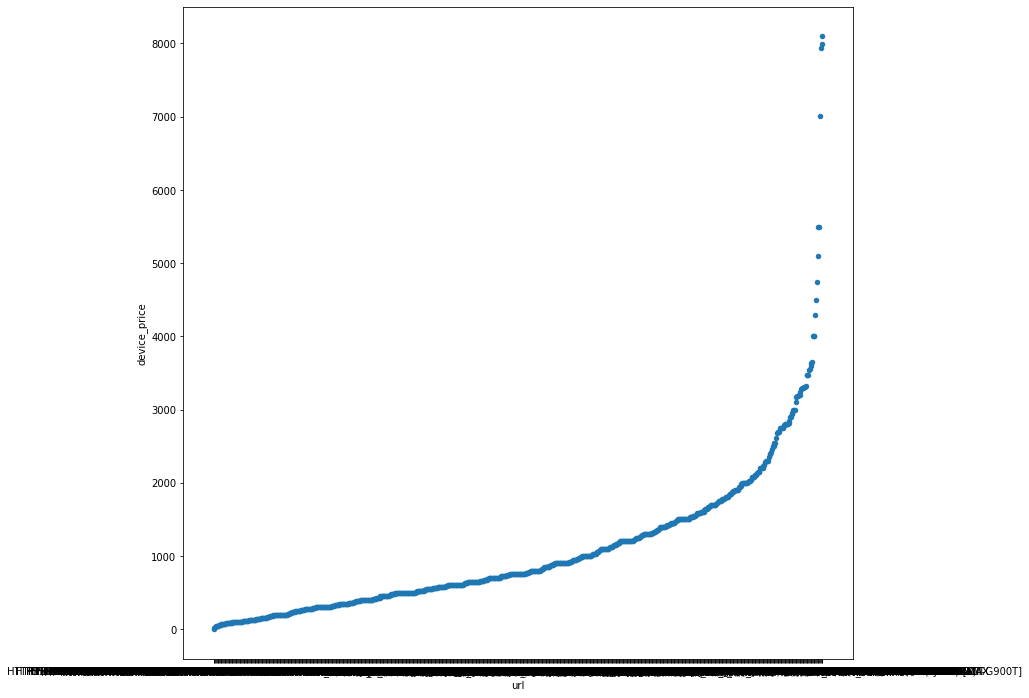

In [15]:
device_extracted_data_df.sort_values(by='device_price', inplace=True)
device_extracted_data_df.plot.scatter(x=0, y='device_price', figsize=(12, 12))

## Prices Binning

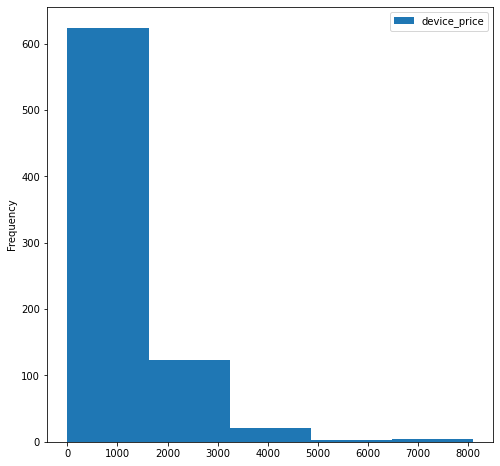

In [16]:
device_extracted_data_df.describe()
device_extracted_data_df.plot.hist(by=['device_price'], bins=5, figsize=(8, 8))

# Price  Ranges
![Brazilian IBGE Salaries Ranges Research](./assets/ibge_brazilian_salary_ranges.jpg)

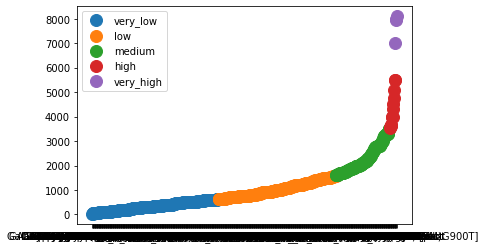

In [17]:
groups = device_extracted_data_df.groupby('ibge_price_range', sort=False)
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['model_name'], group['device_price'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

## Comparing with old price ranges

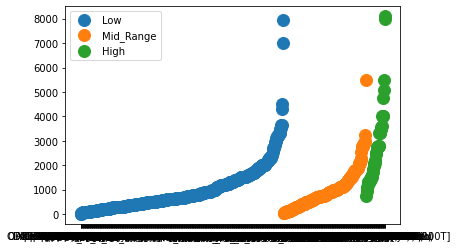

In [18]:
groups = device_extracted_data_df.groupby('old_price_range', sort=False)
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['model_name'], group['device_price'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()